In [125]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [126]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [127]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [128]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [129]:



df = getQuotes(frameM30, 2023, 8)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1690828200,1.10258,1.10293,1.10176,1.10179,2532,8,0
1,1690830000,1.10180,1.10199,1.10107,1.10114,1748,8,0
2,1690831800,1.10114,1.10127,1.10036,1.10065,1719,8,0
3,1690833600,1.10065,1.10110,1.10044,1.10086,1311,8,0
4,1690835400,1.10086,1.10104,1.10037,1.10044,1157,8,0
...,...,...,...,...,...,...,...,...
918,1692999000,1.08103,1.08122,1.08048,1.08067,1928,8,0
919,1693000800,1.08067,1.08105,1.08057,1.08091,1801,8,0
920,1693002600,1.08092,1.08103,1.07992,1.08026,1462,8,0
921,1693004400,1.08025,1.08029,1.07919,1.07920,932,8,0


In [130]:


def trendIntensityIndex(df, lookup = 10):
    df['sma'] = ta.sma(df['close'], length=lookup)
    df['col1'] = np.where((df['close'] > df['sma']), (df['close'] - df['sma']), 0)
    df['col2'] = np.where((df['close'] < df['sma']), (df['sma'] - df['close']), 0)
    df['rollingTotalUp'] = df['col1'].rolling(window=lookup).sum()
    df['rollingTotalDown'] = df['col2'].rolling(window=lookup).sum()
    df['tii'] = ((df['rollingTotalUp']) / (df['rollingTotalUp'] + df['rollingTotalDown'])) * 100
    return df





In [131]:





lookBackPeriod = 10
buyTIIThreshold = 20
sellTIIThreshold = 80

df = trendIntensityIndex(df, lookBackPeriod)

df = df.dropna()

df




,time,open,high,low,close,tick_volume,spread,real_volume,sma,col1,col2,rollingTotalUp,rollingTotalDown,tii
9,1690844400,1.09950,1.09951,1.09931,1.09942,524,8,0,1.100369,0.000000,0.000949,0.000000,0.000949,0.000000
10,1690846200,1.09942,1.09972,1.09937,1.09959,380,8,0,1.100149,0.000000,0.000559,0.000000,0.001508,0.000000
11,1690848000,1.09950,1.09950,1.09930,1.09946,126,31,0,1.099981,0.000000,0.000521,0.000000,0.002029,0.000000
12,1690849800,1.09947,1.09965,1.09945,1.09960,473,38,0,1.099876,0.000000,0.000276,0.000000,0.002305,0.000000
13,1690851600,1.09966,1.10026,1.09954,1.10013,591,8,0,1.099803,0.000327,0.000000,0.000327,0.002305,12.424012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1692999000,1.08103,1.08122,1.08048,1.08067,1928,8,0,1.079390,0.001280,0.000000,0.003863,0.006532,37.162097
919,1693000800,1.08067,1.08105,1.08057,1.08091,1801,8,0,1.079582,0.001328,0.000000,0.005191,0.005349,49.250474
920,1693002600,1.08092,1.08103,1.07992,1.08026,1462,8,0,1.079896,0.000364,0.000000,0.005555,0.002480,69.135034
921,1693004400,1.08025,1.08029,1.07919,1.07920,932,8,0,1.079963,0.000000,0.000763,0.005555,0.001892,74.593796


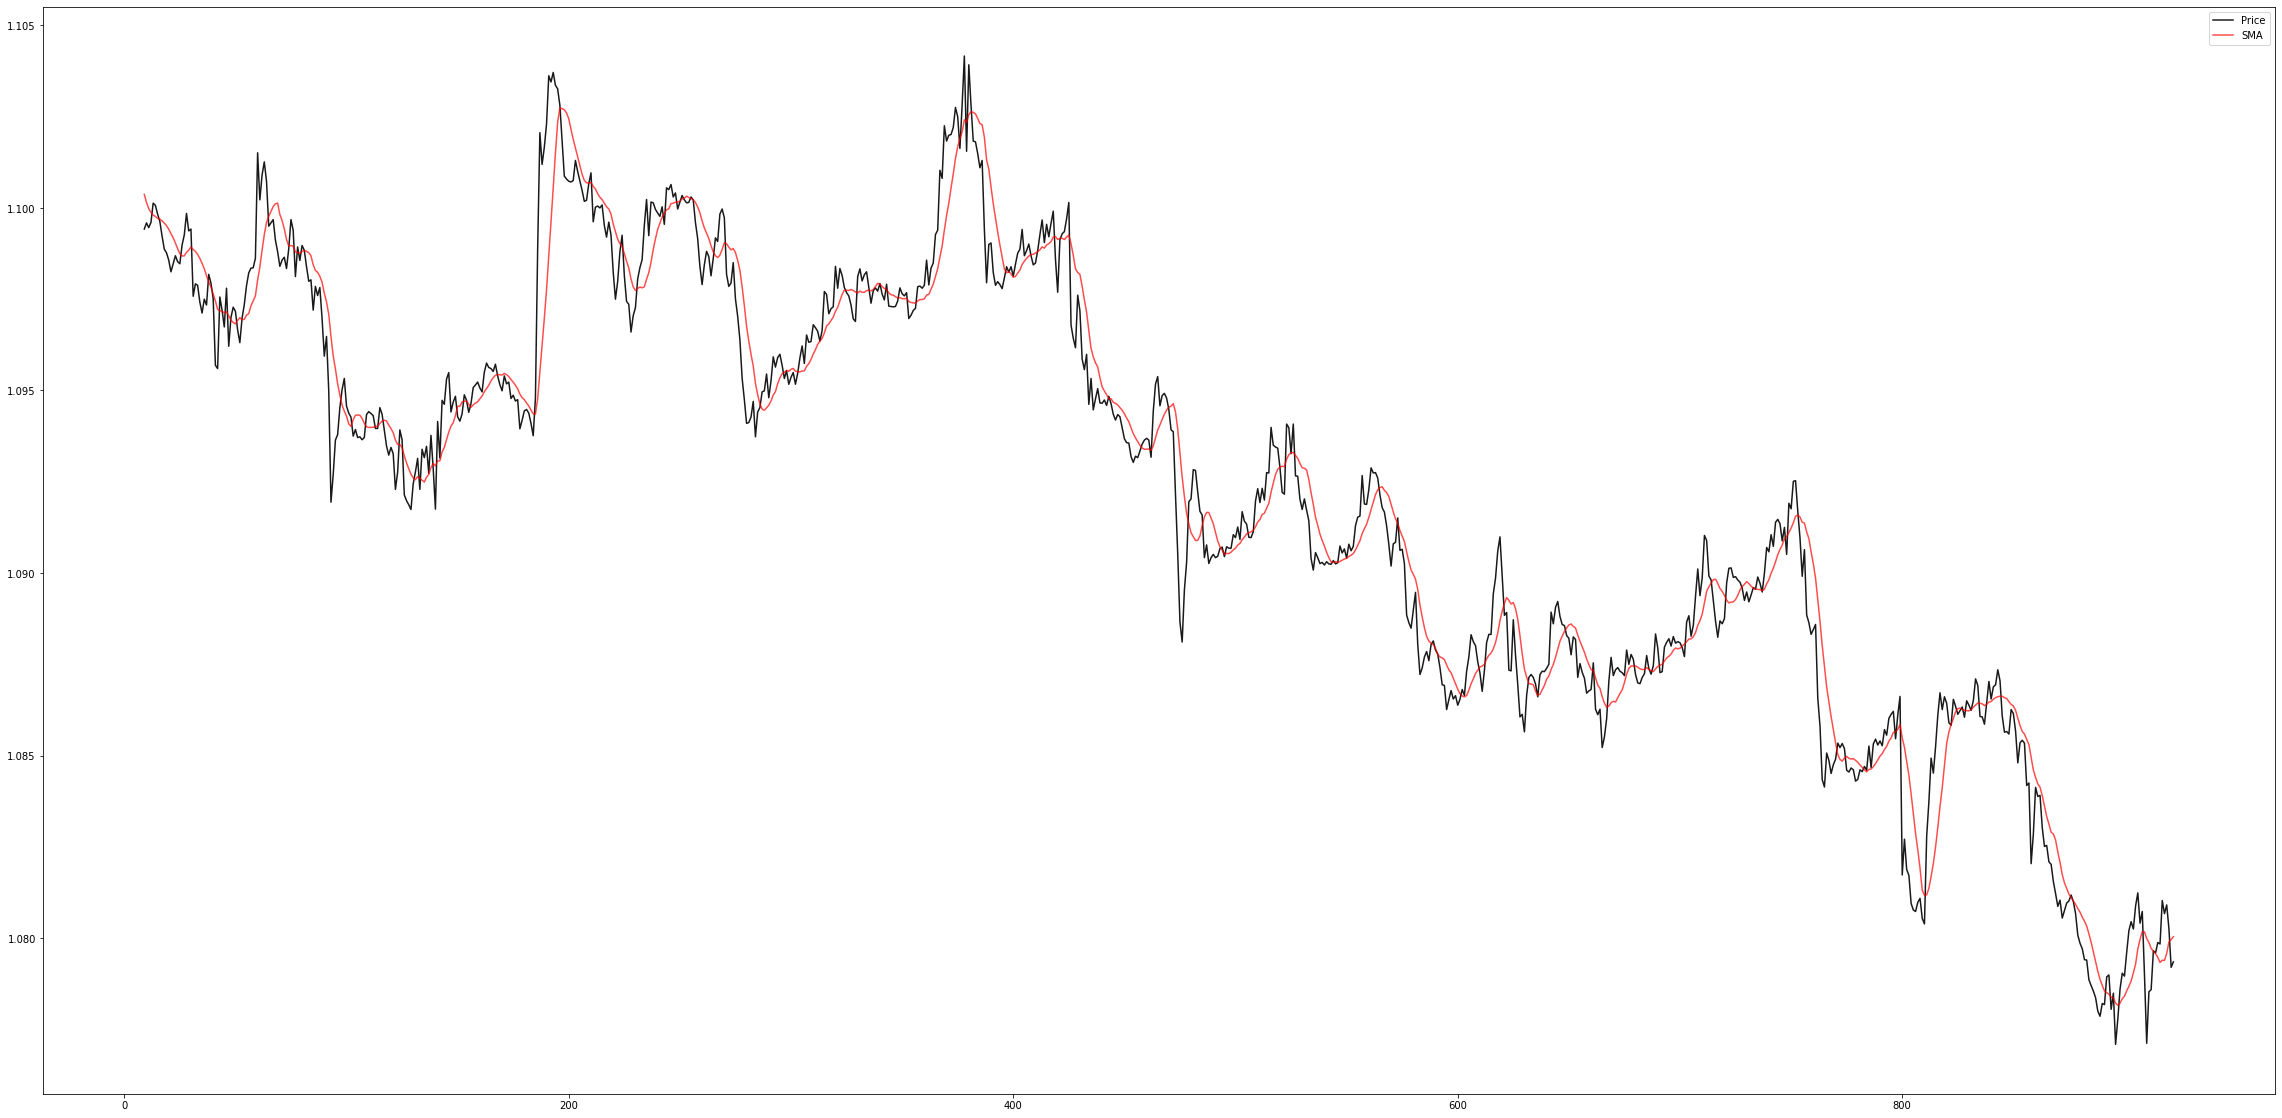

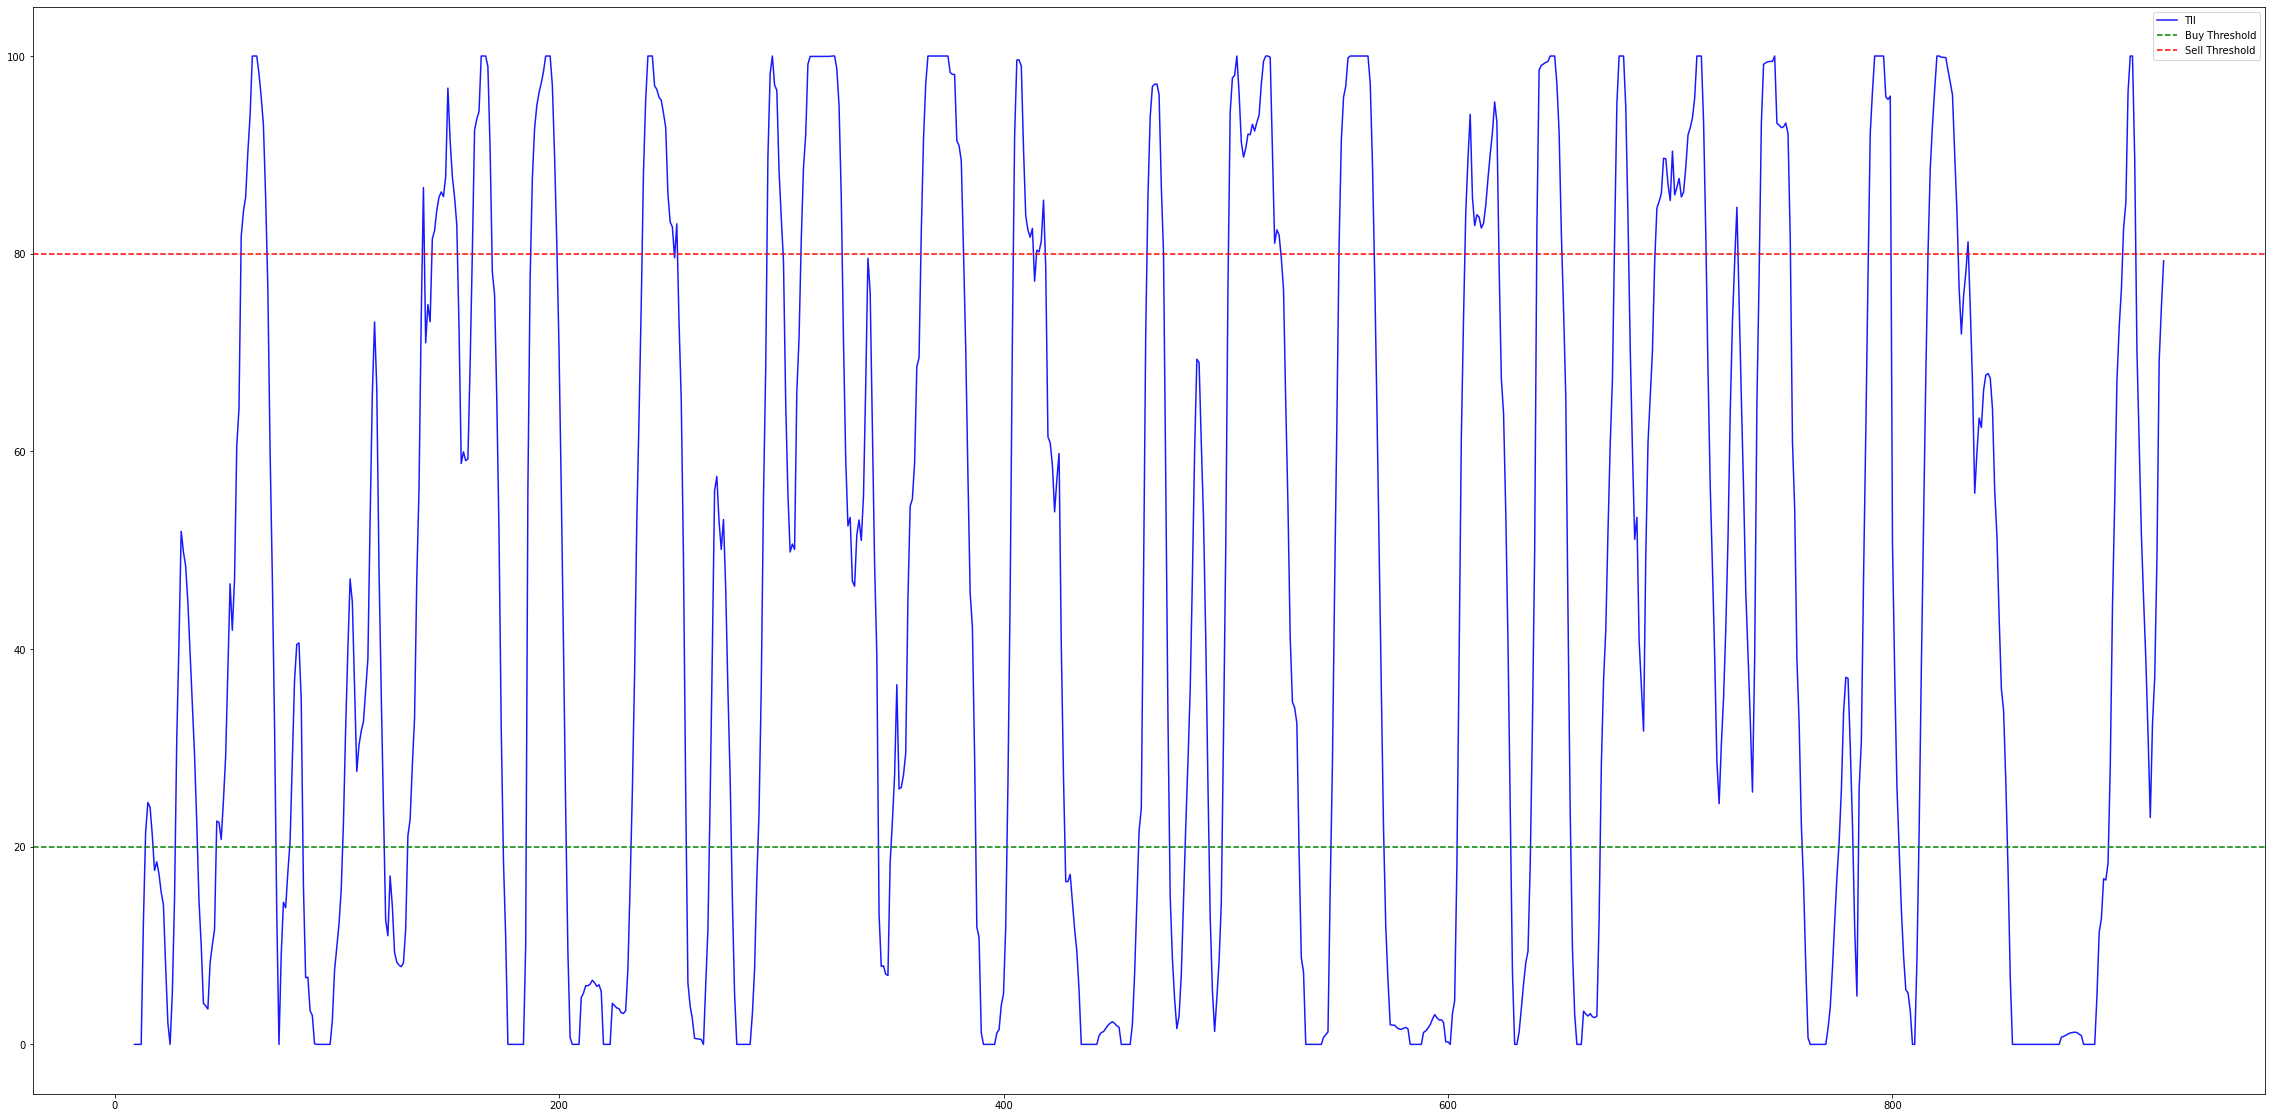

In [132]:






## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='black', alpha=0.9)

## Plotting the SMAs
plt.plot(df['sma'], label='SMA', c='red', alpha=0.7)


# Showing the plot
plt.legend()
plt.show()



## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the tii (Trend Intensity Index)
plt.plot(df['tii'], label='TII', c='blue', alpha=0.9)
plt.axhline(y=buyTIIThreshold, color='g', linestyle='--', label='Buy Threshold')
plt.axhline(y=sellTIIThreshold, color='r', linestyle='--', label='Sell Threshold')


# Showing the plot
plt.legend()
plt.show()





In [133]:




buyIndices = []
sellIndices = []
buys = []
sells = []
openPosition = None
targetPrice = None
pctRise = 0.01

for i in range(len(df)):
    if (i > 0) and (openPosition is None) and (df.iloc[i]['tii'] > 20) and (df.iloc[i - 1]['tii'] < 20):
        openPosition = 'long'
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
        targetPrice = df.iloc[i]['close'] + (pctRise * df.iloc[i]['close'])
    elif (i  > 0) and (openPosition) and (
        (
            (df.iloc[i]['tii'] < 80) and (df.iloc[i - 1]['tii'] > 80)
        ) or
        (
            (targetPrice) and
            (df.iloc[i]['close'] >= targetPrice)
        )
    ):
        openPosition = None
        targetPrice = None
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])






In [134]:


print(buys)
print(sells)



[1.10007, 1.09856, 1.09887, 1.0985800000000001, 1.09983, 1.09765, 1.09876, 1.09364, 1.09281, 1.09055, 1.0877, 1.08731, 1.08769, 1.08455, 1.08374, 1.0786]
[1.0988, 1.09175, 1.10073, 1.10022, 1.09549, 1.10181, 1.09905, 1.09215, 1.09327, 1.09167, 1.08734, 1.08825, 1.08697, 1.08173, 1.08638, 1.07712]


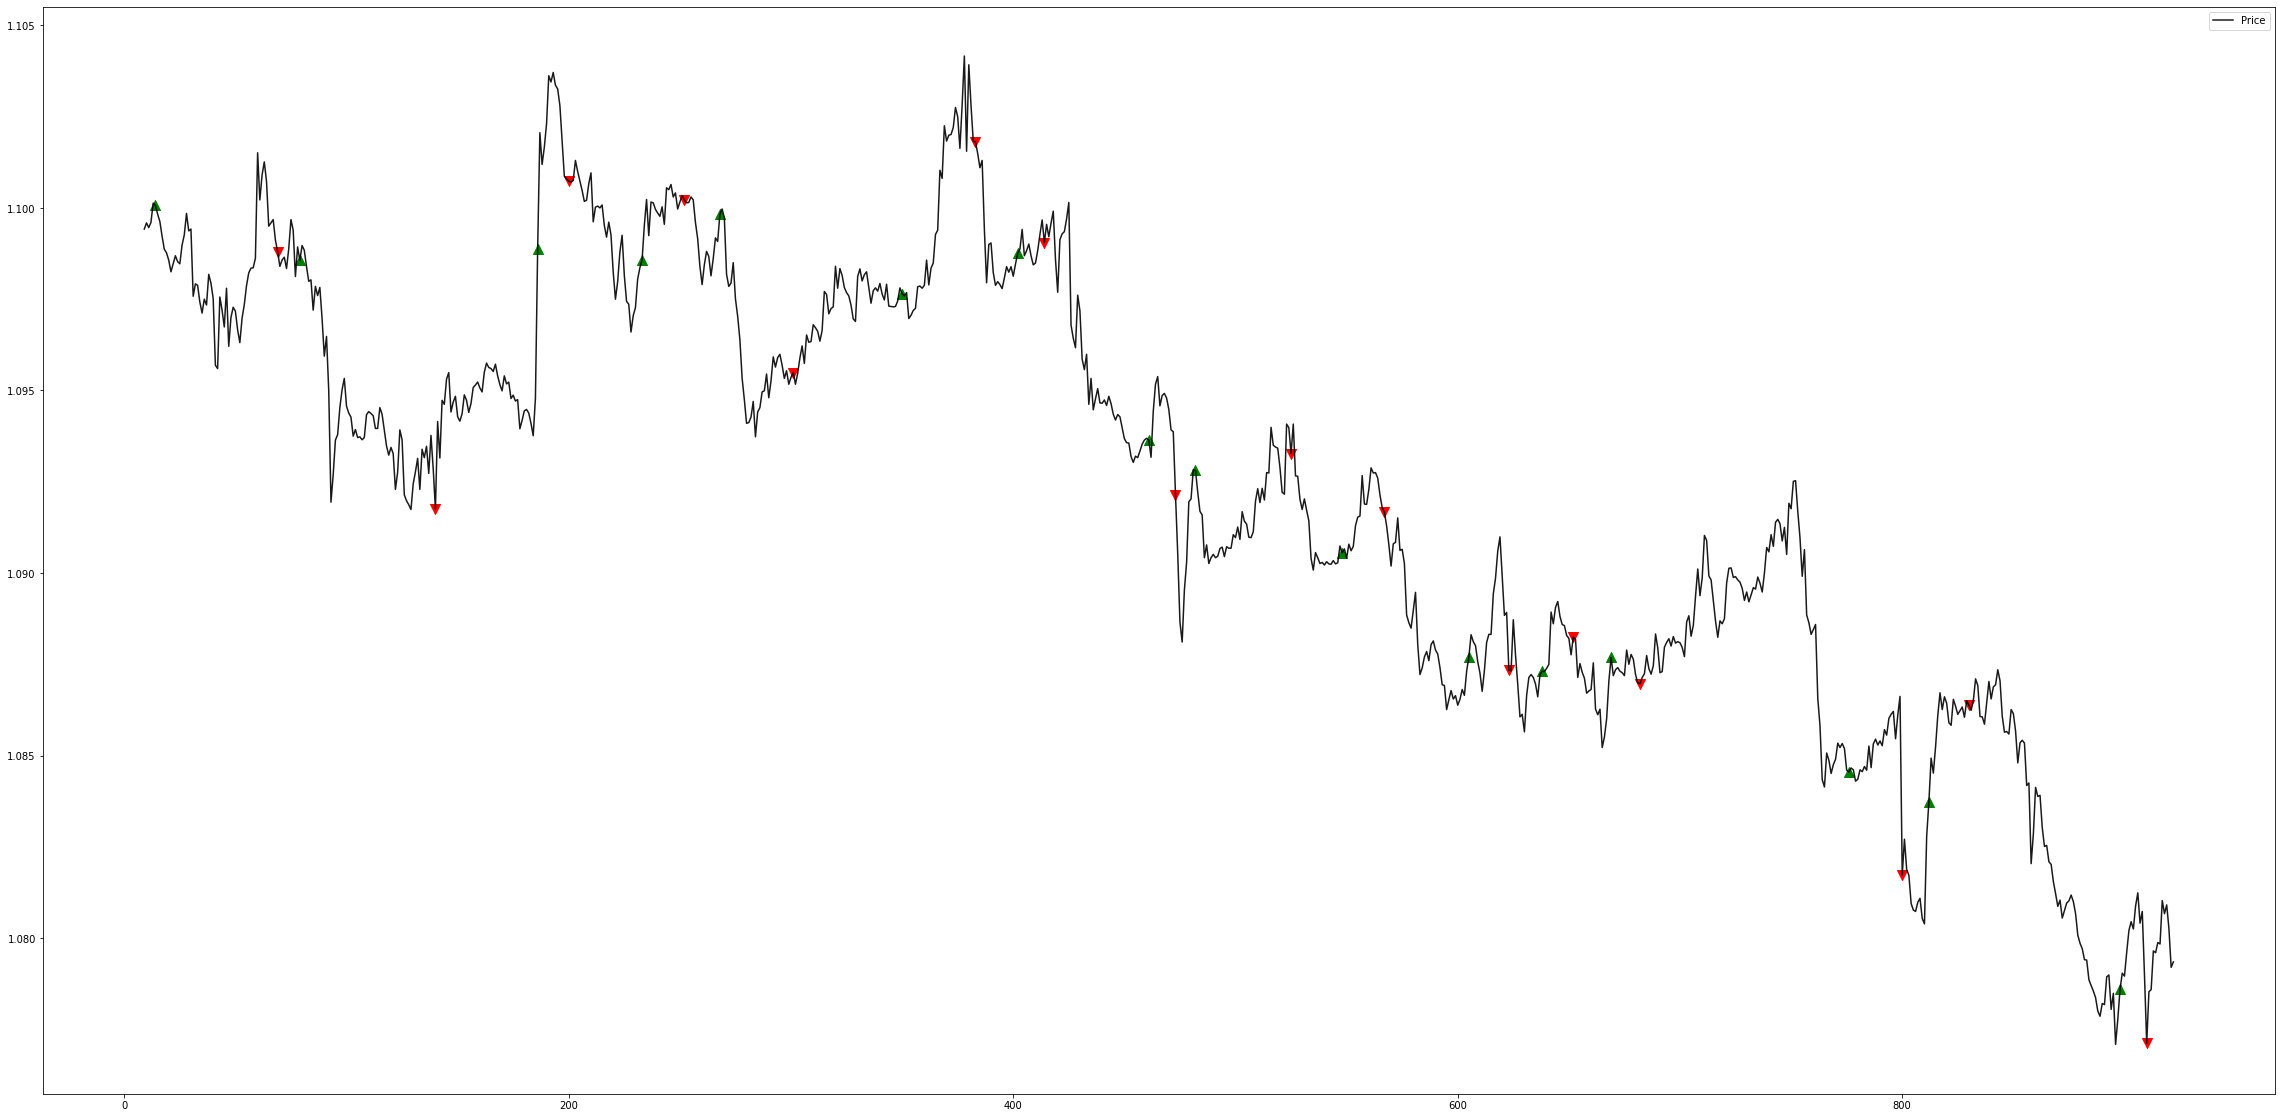

In [135]:











## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='black', alpha=0.9)
plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()














In [136]:






# P & L and other details

totalPL = 0
winTrades = 0
loseTrades = 0
maximumWin = None
maximumLose = None
maximumPercentageWin = None
maximumPercentageLoss = None

for i in range(len(sells)):
    netResult = sells[i] - buys[i]
    maximumValue = max(sells[i], buys[i])
    netResult = netResult - (0.002 * maximumValue);
    percentageWinOrLoss = (netResult / maximumValue) * 100
    message = None

    if netResult < 0:
        loseTrades += 1
        message = f'Lost {percentageWinOrLoss}'
    else:
        winTrades += 1
        message = f'Win {percentageWinOrLoss}'

    if not maximumWin or netResult > maximumWin:
        maximumWin = netResult

    if not maximumLose or netResult < maximumLose:
        maximumLose = netResult

    if not maximumPercentageWin or percentageWinOrLoss > maximumPercentageWin:
        maximumPercentageWin = percentageWinOrLoss

    if not maximumPercentageLoss or percentageWinOrLoss < maximumPercentageLoss:
        maximumPercentageLoss = percentageWinOrLoss

    totalPL = totalPL + netResult
    print(message)

print(f'Total P & L = {totalPL}')
print(f'Win Trades = {winTrades}')
print(f'Lose Trades = {loseTrades}')
print(f'Maximum Win = {maximumWin}')
print(f'Maximum Lose = {maximumLose}')
print(f'Maximum Percentage Win = {maximumPercentageWin}')
print(f'MaximumPercentage Loss = {maximumPercentageLoss}')






Lost -0.3154471988146304
Lost -0.8199024177104558
Lost -0.031021231364642316
Lost -0.050938903128477604
Lost -0.5946064391769648
Win 0.1775605594430929
Lost -0.1736135753605274
Lost -0.3362422735086492
Lost -0.1579243919617382
Lost -0.09740489342017183
Lost -0.23309736140479137
Lost -0.11362278888123678
Lost -0.2661953313903827
Lost -0.4600156747037779
Win 0.043008891916270185
Lost -0.3372149082143451
Total P & L = -0.041164040000000075
Win Trades = 2
Lose Trades = 14
Maximum Win = 0.0019563799999999416
Maximum Lose = -0.009007119999999983
Maximum Percentage Win = 0.1775605594430929
MaximumPercentage Loss = -0.8199024177104558
